# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/UT AI/My Projects/Project 1: Python Foundations: FoodHub/foodhub_order.csv')

In [ ]:
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
print("The number of rows is ",df.shape[0],".", sep='')#here we find the number of rows
print("The number of columns is ",df.shape[1],".", sep='')#here we find the number of columns

The number of rows is 1898.
The number of columns is 9.


#### Observations:

The number of rows is 1898 and the number of columns is 9.

REMARK: The shape() method is used to fetch the dimensions of objects in python. The first number represents the number of rows and the second number represents the number of columns. Therefore, df.shape[0] gives us the number of rows
and df.shape[1] gives us the number of columns.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

There are 5 numeric columns in the DataFrame:

1. order_id, customer_id, food_preparation_time, delivery_time are integers (int64).

2. cost_of_the_order are decimals (float64) in the data.

There are 4 object type columns in the DataFrame:

1. restaurant_name, cuisine_type, day_of_the_week are objects, since these
are strings.

2. The 'rating' column is of an object type (instead of an integer type), because there are some ratings that are marked as "Not given".




### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations: There are no missing values. Here are two reasons for that:

1. The command df.info() gives the number 1898 in each cell of the Non-Null Count. Since this number coincides with the number of rows of the DataFrame, there are no missing values.

2. The command df.isnull().sum() gives zeros next to each category in the table above.

REMARK: Despite the fact that there are no missing values, it is important to note that some ratings are marked as "Not given" (see Question 5 below).


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


In [ ]:
print('The minimum time it takes for food to be prepared once an order is placed:',df['food_preparation_time'].min(),'min.')
print('The average time it takes for food to be prepared once an order is placed:',df['food_preparation_time'].mean(),'min.')
print('The maximum time it takes for food to be prepared once an order is placed:',df['food_preparation_time'].max(),'min.')

The minimum time it takes for food to be prepared once an order is placed: 20 min.
The average time it takes for food to be prepared once an order is placed: 27.371970495258168 min.
The maximum time it takes for food to be prepared once an order is placed: 35 min.


#### Observations:

The minimum time it takes for food to be prepared once an order is placed: 20 min.

The average time it takes for food to be prepared once an order is placed: 27.37 min.

The maximum time it takes for food to be prepared once an order is placed: 35 min.




### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
print(df['rating'].unique())


['Not given' '5' '3' '4']


In [ ]:
print("There are", df['rating'].value_counts()['Not given'], "orders that are not rated.")

There are 736 orders that are not rated.


In [ ]:
df['rating'].value_counts()#better approach

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:

We first find the list of all unique values in the 'ratings' column using the command
df['rating'].unique(). We see that when an order is not rated it is marked as
'Not given'.

After that we use the command df['rating'].value_counts()['Not given'] in order to count the number of occurrences of 'Not given' in the 'rating' column.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [ ]:
df.nunique()#IMPORTANT: I missed that

order_id                 1898
customer_id              1200
restaurant_name           178
cuisine_type               14
cost_of_the_order         312
day_of_the_week             2
rating                      4
food_preparation_time      16
delivery_time              19
dtype: int64

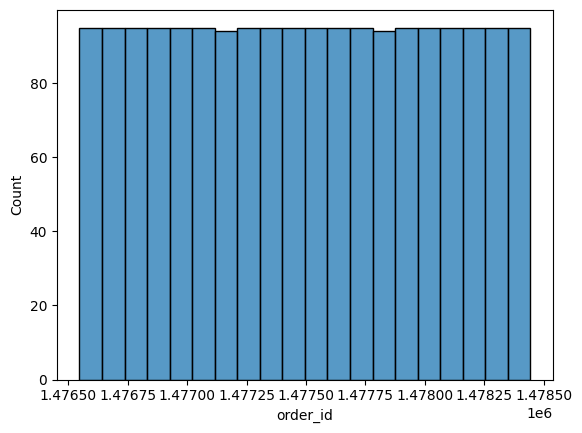

In [ ]:
sns.histplot(data=df, x='order_id', bins=20);

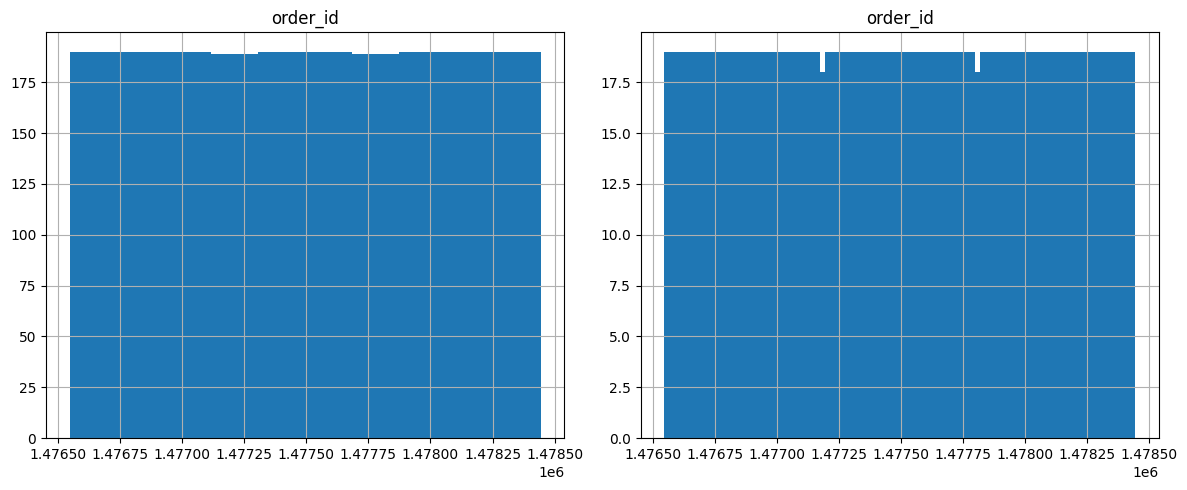

In [ ]:
plt.rcParams["figure.figsize"] = [12, 5]
plt.rcParams["figure.autolayout"] = True

fig, axes = plt.subplots(1, 2);


df.hist('order_id', ax=axes[0], bins=10)
df.hist('order_id', ax=axes[1], bins=100)

plt.show()



Observation: The histogram for the order_id column shows that the values are distributed uniformly. However, in the middle of each histogram we see two little irregularities that potentially might mean that the order ids are not distributed evenly. Further analysis (see below) shows that this is not the case.

In [ ]:
sr_oid=df['order_id'].sort_values(ascending=True)
df_oid=sr_oid.to_frame()
df_oid['dif']= df_oid['order_id'].shift(-1)-df_oid['order_id']
df_oid['dif'].describe()

count    1897.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: dif, dtype: float64

In the code above we first create a sorted series out of the order_id column.
Then we convert this series into a dataframe and in this new dataframe we create a new column which consists of differences of consecutive order_id numbers. We see that all these differences are equal to one, since max=min=1.
This means that order_id numbers are distributed perfectly uniformly.

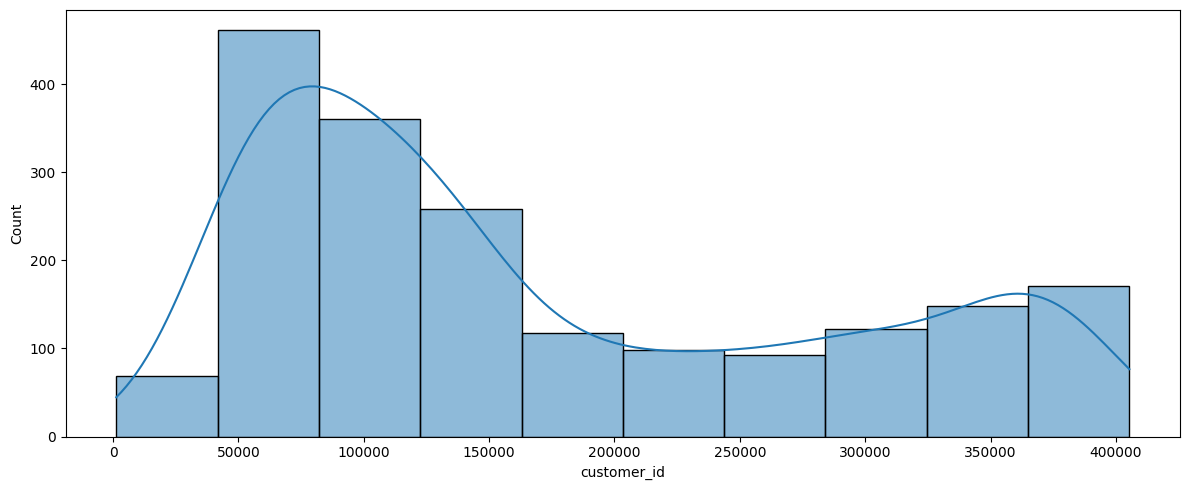

In [ ]:
sns.histplot(data=df, x='customer_id', bins=10, kde=True);

The mode is 52832
The median is 128600.0
The mean is 171168.478398314


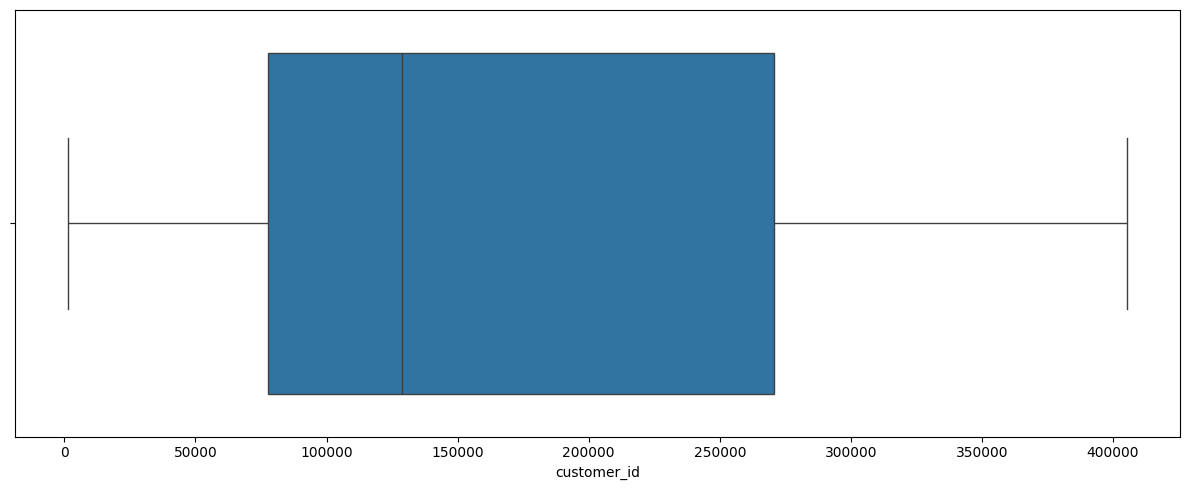

In [ ]:
sns.boxplot(data=df, x='customer_id');
print("The mode is",df['customer_id'].mode().iloc[0]);
print("The median is",df['customer_id'].median());
print("The mean is",df['customer_id'].mean());

Observations:

The histogram for the customer_id values is right-skewed because it has a tail to the right (the box-plot confirms that) and because mode<median<mean.

We also note that this histogram can be considered as a bimodal shape histogram, since its KDE has two peaks.

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 142 (\x8e) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 140 (\x8c) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


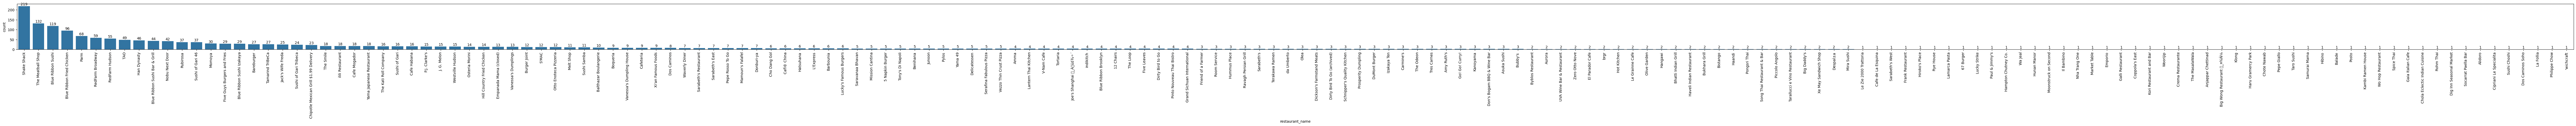

In [ ]:
plt.figure(figsize=(100,5));
ax=sns.countplot(data=df, x='restaurant_name', order=df['restaurant_name'].value_counts().index);
ax.bar_label(ax.containers[0]);
plt.xticks(rotation=90);

Observations: The bar chart shows that the most popular restaurant is Shake Shack. The number of orders drops dramatically immediately after that and the second most popular restaurant is the Meatball Shop.

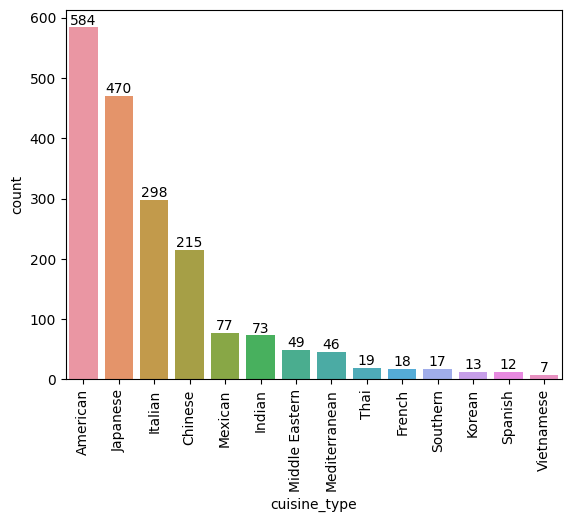

In [ ]:
ax=sns.countplot(data=df, x='cuisine_type', order=df['cuisine_type'].value_counts().index);
ax.bar_label(ax.containers[0]);
plt.xticks(rotation=90);

Observations: The bar chart shows that the most popular cuisine is American. The three most popular cuisines after American are Japanese, Italian, and Chinese. After that, the number of orders drops dramatically.

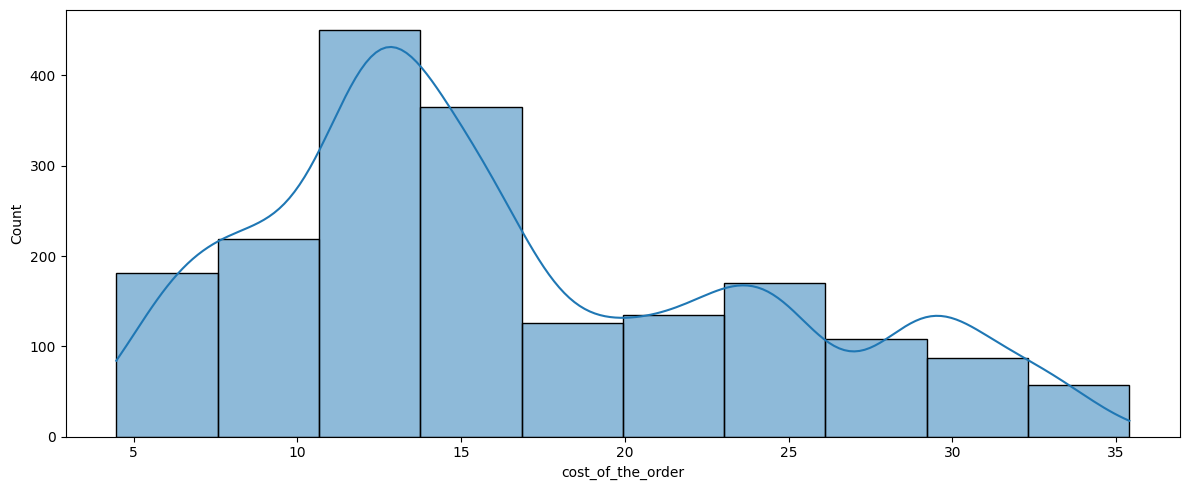

In [ ]:
sns.histplot(data=df, x='cost_of_the_order', bins=10, kde=True);

The mode is 12.18
The median is 14.14
The mean is 16.498851422550054


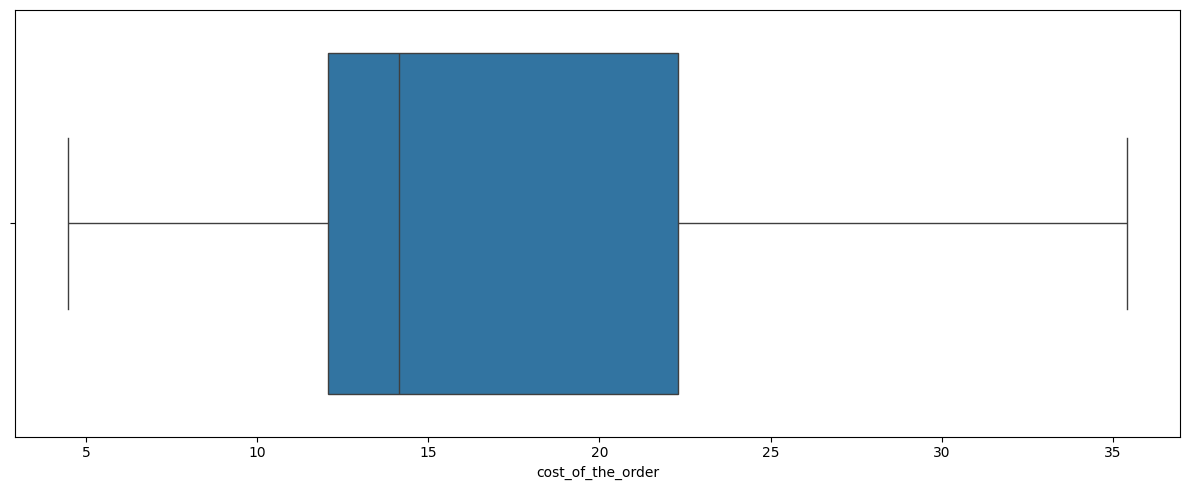

In [ ]:
sns.boxplot(data=df, x='cost_of_the_order');
print("The mode is",df['cost_of_the_order'].mode().iloc[0]);
print("The median is",df['cost_of_the_order'].median());
print("The mean is",df['cost_of_the_order'].mean());

Observations:

The histogram for the cost_of_the_order values is right-skewed because it has a tail to the right (the box-plot confirms that) and because mode<median<mean.
Since the median is <15, most of the orders are lesser than $15. We can see a similar picture if we consider separately the weekday and weekend orders (see below).

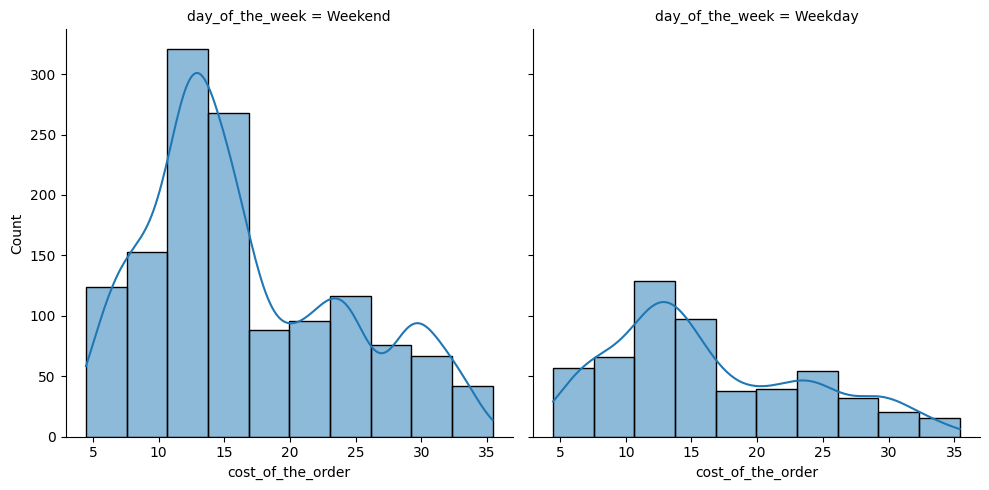

In [ ]:
sns.displot(df, x="cost_of_the_order", col="day_of_the_week", bins=10, kde=True);

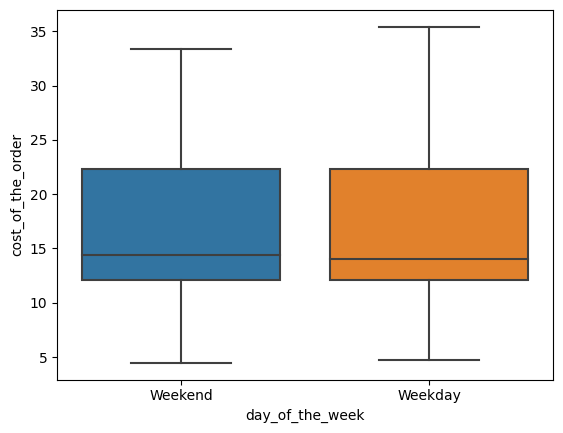

In [ ]:
sns.boxplot(data=df, x='day_of_the_week', y='cost_of_the_order');

Observations: In the above histograms and boxplots we split all the cost_of_the_order values
into two groups: Weekends and Weekdays.

1. The histograms show that there are more orders during the weekends than during the weekdays. In is interesting to note that the general shape of the two histograms is about the same.

2. The boxplots show that min, 25%, 50% and 75% are about the same in both cases. The only difference is that the maximum values on the weekdays is slightly bigger than on the weekends.



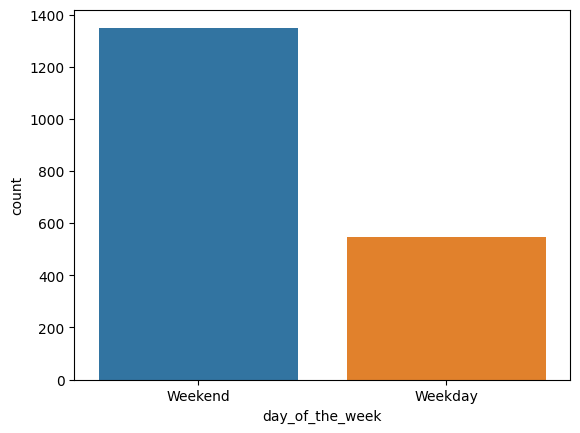

In [ ]:
sns.countplot(data=df, x='day_of_the_week');

Observation: There are more than twice as many the weekend orders than the weekday orders.

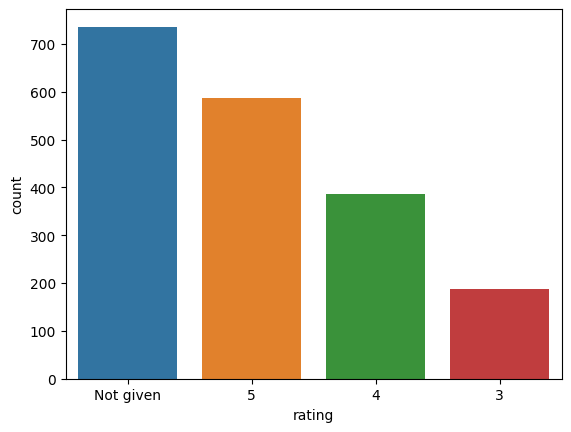

In [ ]:
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index);

Observations: Most customers chose not to give ratings. The number of good ratings is bigger than the number of bad ratings. The number of customers that give a certain rating is approximately proportional to the value of this rating.

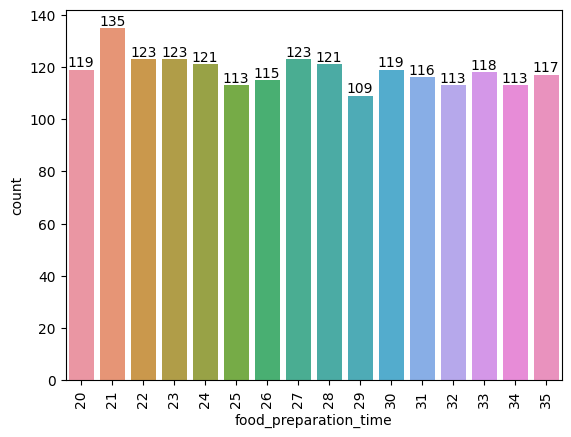

In [ ]:
ax=sns.countplot(data=df, x='food_preparation_time');
ax.bar_label(ax.containers[0]);
plt.xticks(rotation=90);

Observations: The food preparation times are distributed approximately uniformly. In 135 cases (max) the food preparation time was 21 min and
in 109 cases (min) the food preparation time was 29 min. We also note that
there are approximately the same number of cases (119 vs 117) with the shortest (20 min) and the longest (35 min) food preparation time.

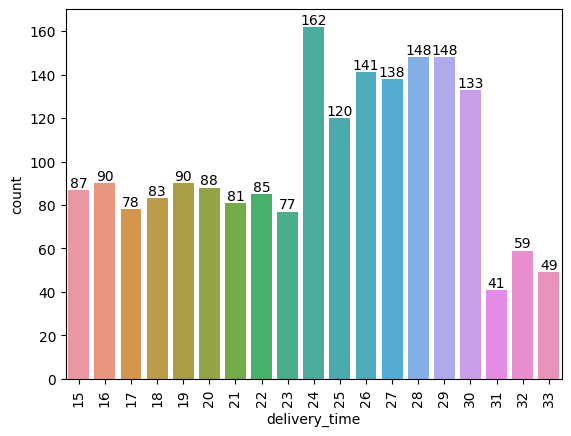

In [ ]:
ax=sns.countplot(data=df, x='delivery_time');
ax.bar_label(ax.containers[0]);
plt.xticks(rotation=90);

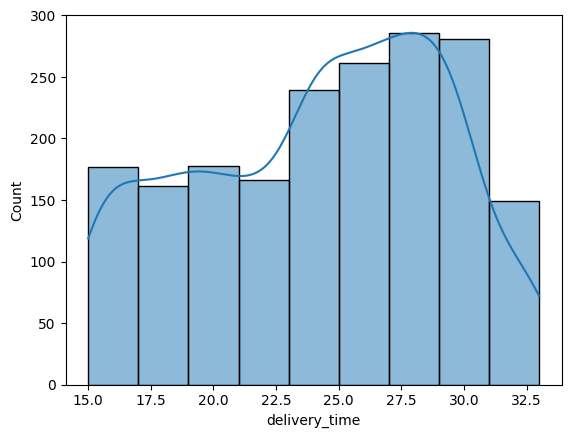

In [ ]:
sns.histplot(data=df, x='delivery_time', bins=9, kde=True);

The mode is 24
The median is 25.0
The mean is 24.161749209694417


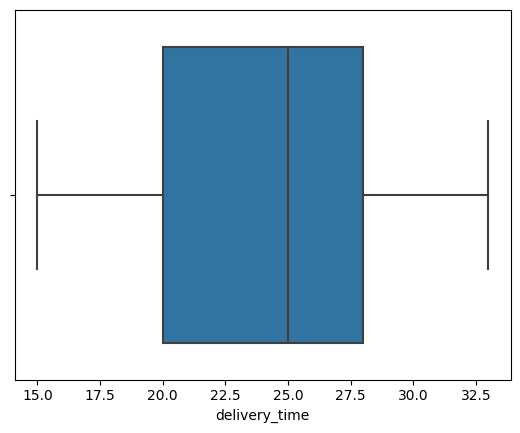

In [ ]:
sns.boxplot(data=df, x='delivery_time');
print("The mode is",df['delivery_time'].mode().iloc[0]);
print("The median is",df['delivery_time'].median());
print("The mean is",df['delivery_time'].mean());

Observations: As we discussed above, the food preparation times are distributed approximately uniformly. However, we see quite different picture when we look at the delivery times. The histogram is slightly left-skewed. We also notice that contrary to the common left-skewed rule, mean< median, but median is not <mode.

According to the bar plot, most orders were delivered between 24 and 30 minutes. 50% of the orders were delivered in <=25 min. The shortest delivery time is 15 min, the longest delivery time is 33 min.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
df['restaurant_name'].value_counts().head()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations: The top 5 restaurants in terms of the number of orders received are Shake Shack, the Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
#df.groupby('day_of_the_week')['cuisine_type'].value_counts()#This is one way to answer the question
df[df['day_of_the_week']=='Weekend'].groupby('cuisine_type')['cuisine_type'].value_counts().sort_values(ascending=False)

cuisine_type    cuisine_type  
American        American          415
Japanese        Japanese          335
Italian         Italian           207
Chinese         Chinese           163
Mexican         Mexican            53
Indian          Indian             49
Mediterranean   Mediterranean      32
Middle Eastern  Middle Eastern     32
Thai            Thai               15
French          French             13
Korean          Korean             11
Southern        Southern           11
Spanish         Spanish            11
Vietnamese      Vietnamese          4
Name: cuisine_type, dtype: int64

#### Observations:

The most popular cuisine on weekends is American (415 orders).


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
our_orders=df[df['cost_of_the_order']>20].shape[0]
all_orders=df.shape[0]
100*our_orders/all_orders

29.24130663856691

#### Observations:

29.24%  of the orders cost more than 20 dollars.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
df['delivery_time'].mean()

24.161749209694417

#### Observations:

The mean order delivery time is 24.16 min.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
sr=df['customer_id'].value_counts()
#print(sr.head())#This is one way to answer the question
print("Here are the top 3 most frequent customers:\n")
print("The customer with ID ",sr.keys()[0]," placed ", sr.iloc[0]," orders.",sep='')
print("The customer with ID ",sr.keys()[1]," placed ", sr.iloc[1]," orders.",sep='')
print("The customer with ID ",sr.keys()[2]," placed ", sr.iloc[2]," orders.",sep='')

Here are the top 3 most frequent customers:

The customer with ID 52832 placed 13 orders.
The customer with ID 47440 placed 10 orders.
The customer with ID 83287 placed 9 orders.


#### Observations: The easiest way to answer the question is to use the

df['customer_id'].value_counts().head()

command. However, here we do it in a different way.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


We first find all pairwise correlations between the numerical variables cost_of_the_order,food_preparation_time, and delivery_time.

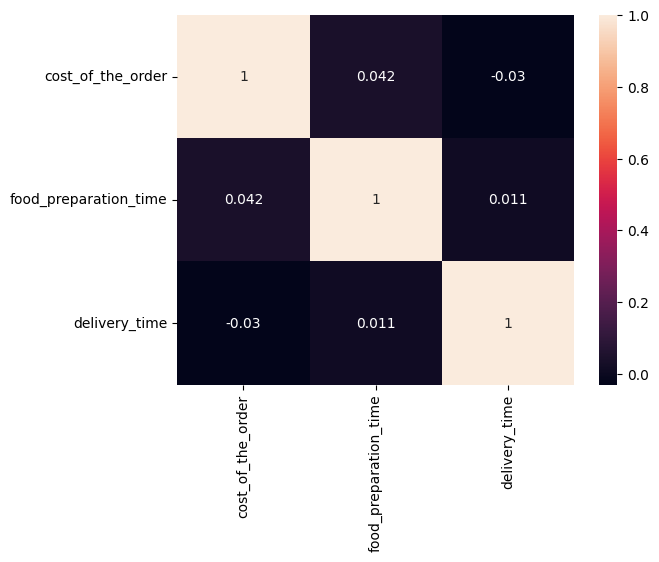

In [ ]:
sns.heatmap(data=df[['cost_of_the_order','food_preparation_time','delivery_time']].corr(), annot=True);

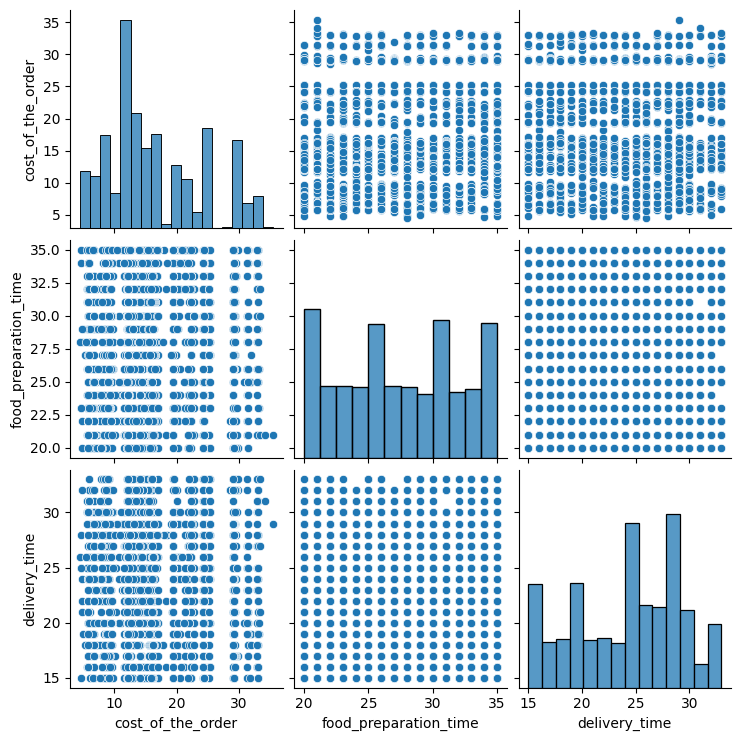

In [ ]:
sns.pairplot(data=df[['cost_of_the_order','food_preparation_time','delivery_time']]);

Conclusion: We can see that there are no strong correlations between any two of these variables.

We now create a new dataframe where all the ratings are only 3, 4, or 5. After that we look at all pairwise correlations between the numerical variables cost_of_the_order, rating, food_preparation_time, and delivery_time.

In [ ]:
dfr=df[df['rating']!='Not given']
dfr['rating'] = dfr['rating'].astype(int)

<ipython-input-35-bf0272e6d9e1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfr['rating'] = dfr['rating'].astype(int)


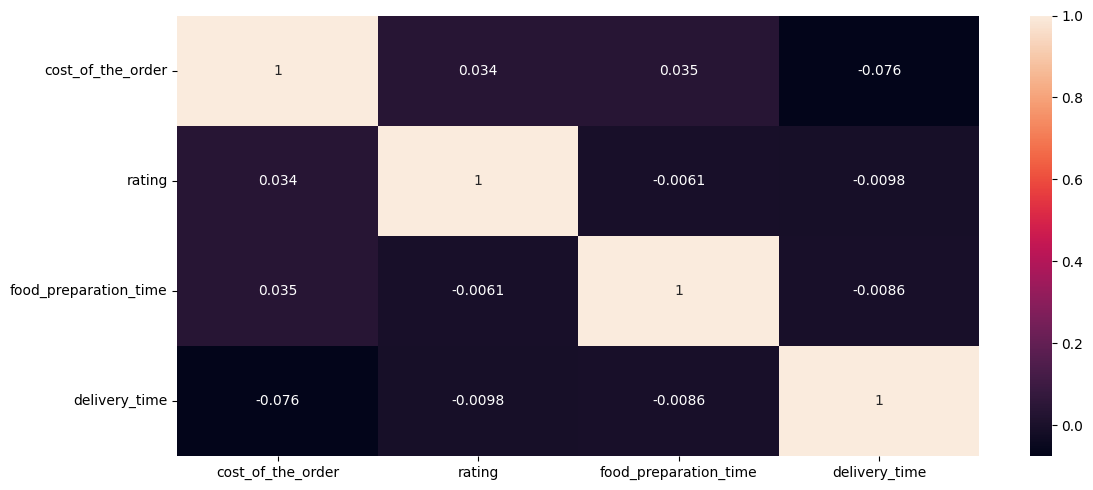

In [ ]:
sns.heatmap(data=dfr[['cost_of_the_order','rating','food_preparation_time','delivery_time']].corr(), annot=True);

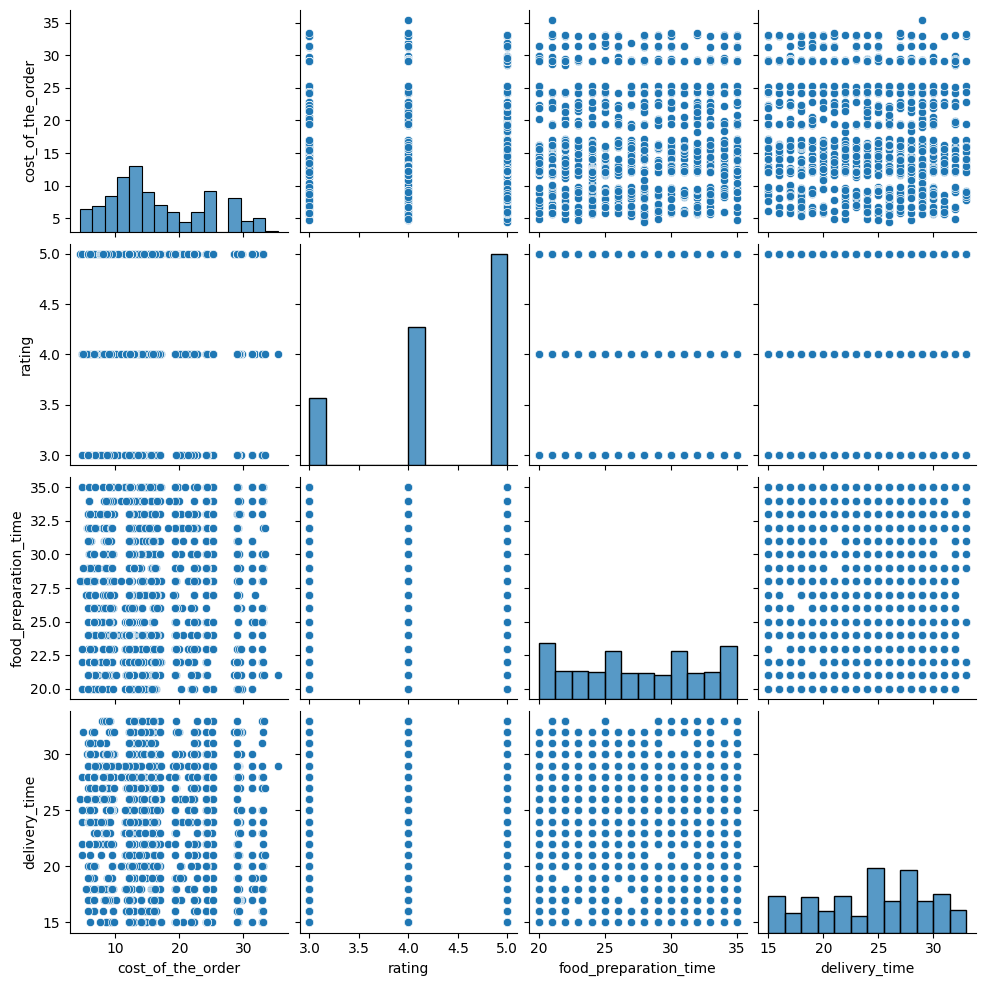

In [ ]:
sns.pairplot(data=dfr[['cost_of_the_order','rating','food_preparation_time','delivery_time']]);

Conclusion: We can see that there is no strong correlation between any two of these variables.

Let us look at the relationships between rating and either cost_of_the_order, food_preparation_time, or delivery_time.

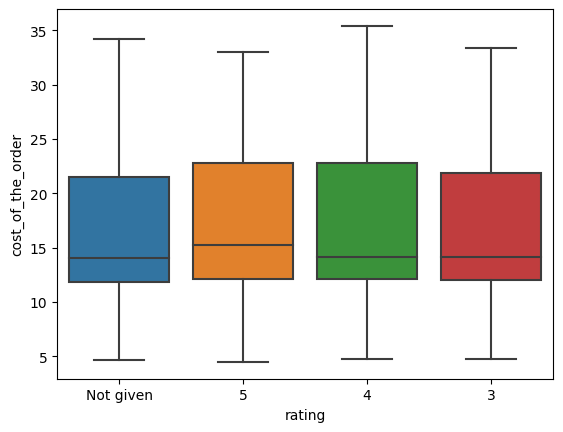

In [ ]:
sns.boxplot(data=df,x='rating', y='cost_of_the_order',order=df['rating'].value_counts().index)
plt.show()

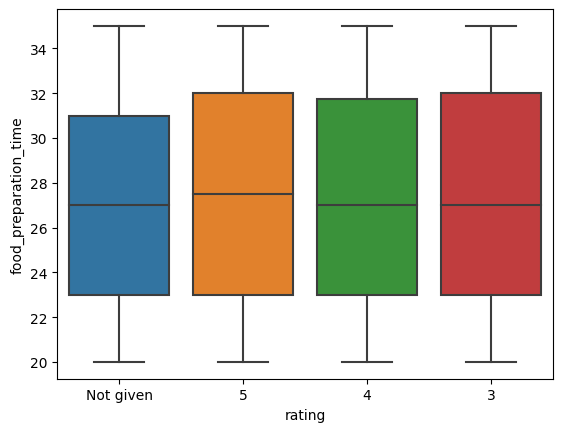

In [ ]:
sns.boxplot(data=df,x='rating', y='food_preparation_time',order=df['rating'].value_counts().index)
plt.show()

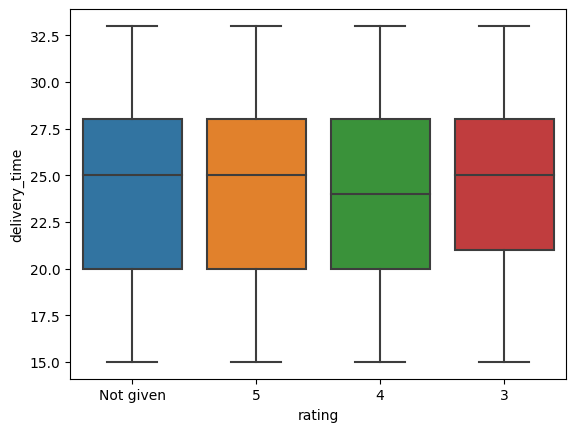

In [ ]:
sns.boxplot(data=df,x='rating', y='delivery_time',order=df['rating'].value_counts().index)
plt.show()

Conclusion: In all three cases we see that the box plots are almost identical regardless the rating. In particular, in the lowest rating (3) and in the highest rating (5) the median food median delivery time is about the same (25 min).

Let us look at the relationships between cuisine_type and either cost_of_the_order, rating, food_preparation_time, or delivery_time.
Before we do so, let us look once again at the number of orders for each of the cuisine_type to make sure that our conclusions are reliable.

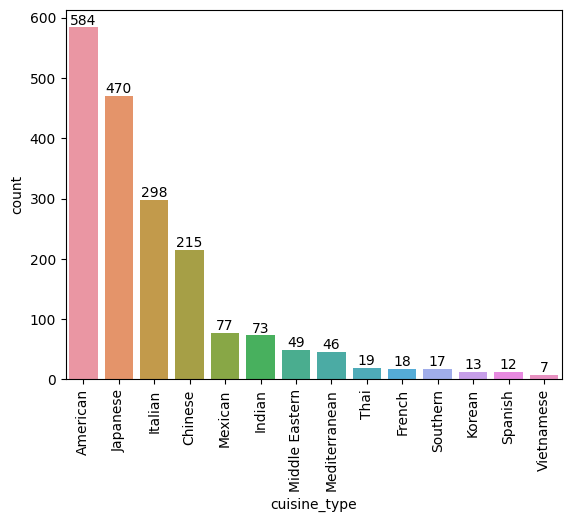

In [ ]:
ax=sns.countplot(data=df, x='cuisine_type', order=df['cuisine_type'].value_counts().index);
ax.bar_label(ax.containers[0]);
plt.xticks(rotation=90);

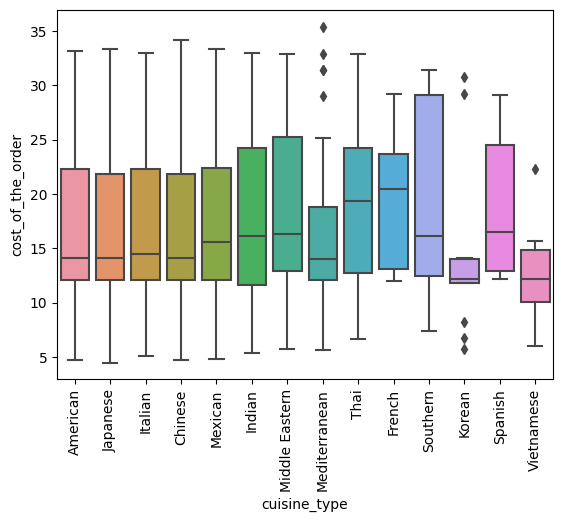

In [ ]:
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order', order=df['cuisine_type'].value_counts().index);
plt.xticks(rotation=90);

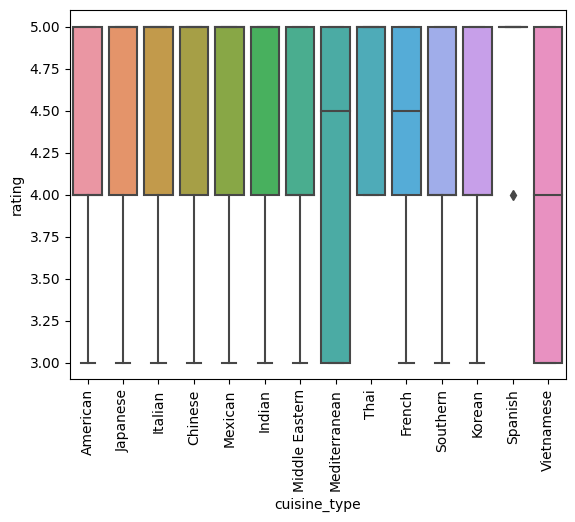

In [ ]:
sns.boxplot(data=dfr, x='cuisine_type', y='rating', order=df['cuisine_type'].value_counts().index);
plt.xticks(rotation=90);

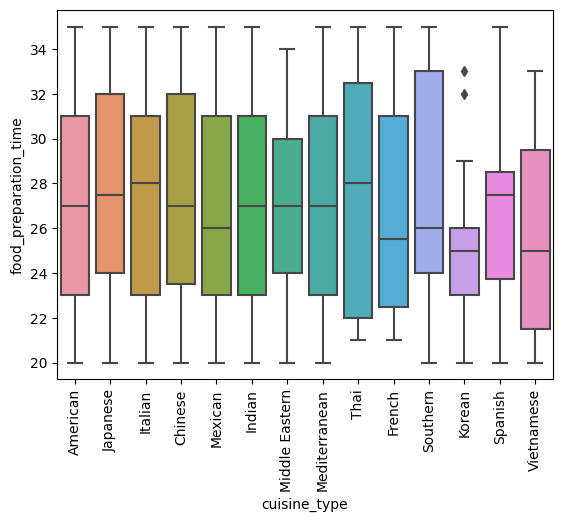

In [ ]:
sns.boxplot(data=df, x='cuisine_type', y='food_preparation_time', order=df['cuisine_type'].value_counts().index);
plt.xticks(rotation=90);

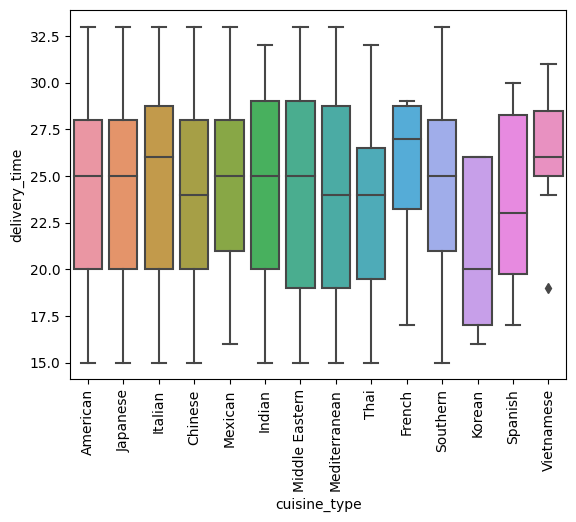

In [ ]:
sns.boxplot(data=df, x='cuisine_type', y='delivery_time', order=df['cuisine_type'].value_counts().index);
plt.xticks(rotation=90);

Conclusions: We see that there are some irregularities in certain cuisines starting from Mediterranean. But this can be attributed to the fact that the number of orders for these cuisines is significantly lower than, for example, for American or Japanese. On the other hand, the boxplots for the top 4 quisines (American, Japanese, Italian and Chinese) are pretty similar.  

Let us look at the relationships between day_of_the_week and either cost_of_the_order, rating, food_preparation_time, or delivery_time.
Before we do so, let us look once again at the number of orders for weekends and weekdays.

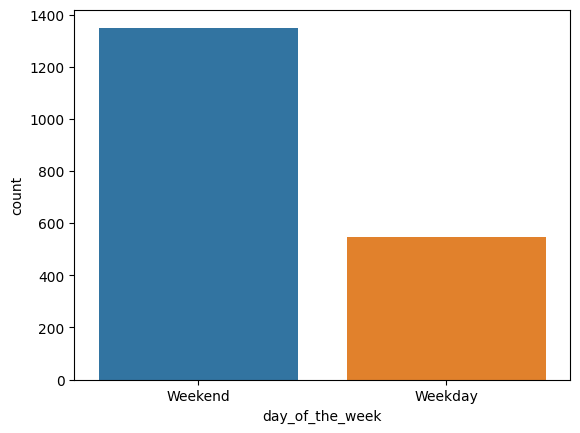

In [ ]:
sns.countplot(data=df, x='day_of_the_week');

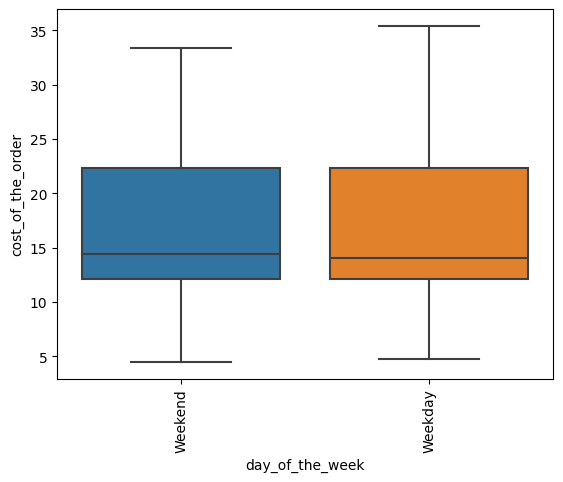

In [ ]:
sns.boxplot(data=df, x='day_of_the_week', y='cost_of_the_order', order=df['day_of_the_week'].value_counts().index);
plt.xticks(rotation=90);

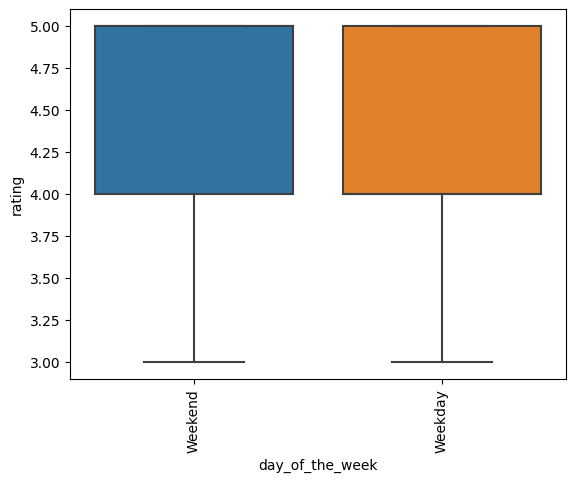

In [ ]:
sns.boxplot(data=dfr, x='day_of_the_week', y='rating', order=df['day_of_the_week'].value_counts().index);
plt.xticks(rotation=90);

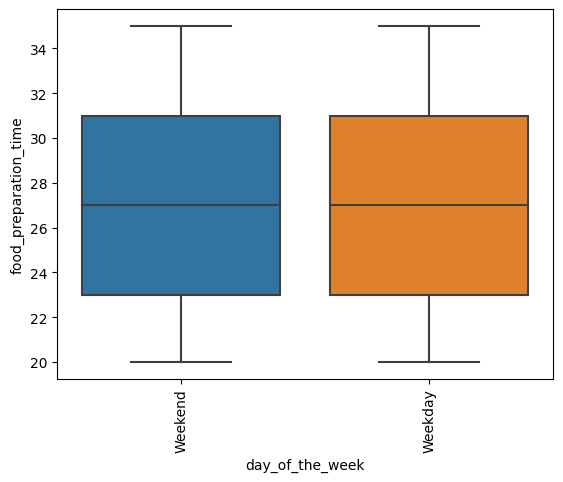

In [ ]:
sns.boxplot(data=df, x='day_of_the_week', y='food_preparation_time', order=df['day_of_the_week'].value_counts().index);
plt.xticks(rotation=90);

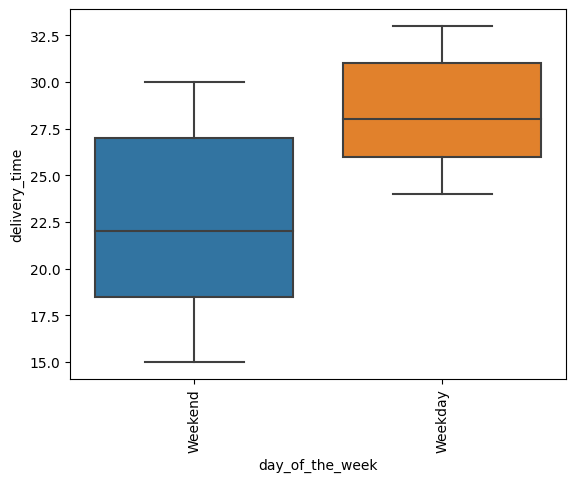

In [ ]:
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time', order=df['day_of_the_week'].value_counts().index);
plt.xticks(rotation=90);

Conclusions: We see that there is a significant difference between the boxplots for the delivery_time. On the weekdays the delivery times are significantly longer than on the weekends despite the fact that there are about 2.5 times more order on the weekends than on the weekdays. One way to explain it is to assume that on the weekends it is easier to hire people who want to make extra income as a delivery guys and so the delivery personnel is bigger on the weekends than on the weekdays.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
dfr=df[df['rating']!='Not given']#we exclude rows where the rating is not given
dff=dfr.groupby('restaurant_name').count()#we count the number of items for each restaurant

In [ ]:
dfr['rating'].info()#we check the data type of the 'rating' column

<class 'pandas.core.series.Series'>
Int64Index: 1162 entries, 2 to 1896
Series name: rating
Non-Null Count  Dtype 
--------------  ----- 
1162 non-null   object
dtypes: object(1)
memory usage: 18.2+ KB


In [ ]:
#In order to find the average rating we should first convert each rating (object) into int
ddf = dfr.astype({'rating':'int'})
ddf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1162 entries, 2 to 1896
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1162 non-null   int64  
 1   customer_id            1162 non-null   int64  
 2   restaurant_name        1162 non-null   object 
 3   cuisine_type           1162 non-null   object 
 4   cost_of_the_order      1162 non-null   float64
 5   day_of_the_week        1162 non-null   object 
 6   rating                 1162 non-null   int64  
 7   food_preparation_time  1162 non-null   int64  
 8   delivery_time          1162 non-null   int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 90.8+ KB


In [ ]:
dfm=ddf.groupby('restaurant_name').mean()#we find means
dfm

<ipython-input-40-91772c9608c0>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfm=ddf.groupby('restaurant_name').mean()#we find means


,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time
restaurant_name,,,,,,
'wichcraft,1478304.0,321492.000000,8.100000,5.000000,28.000000,28.0
12 Chairs,1477764.5,251052.000000,22.675000,4.500000,27.500000,29.0
5 Napkin Burger,1477921.0,263185.500000,27.135000,4.000000,26.500000,21.0
67 Burger,1478041.0,96456.000000,29.050000,5.000000,20.000000,28.0
Amma,1477583.5,109778.500000,20.155000,4.500000,23.500000,25.5
...,...,...,...,...,...,...
Zero Otto Nove,1477801.0,268365.000000,12.180000,4.000000,29.000000,25.0
brgr,1477306.0,94691.000000,5.720000,3.000000,24.000000,26.0
da Umberto,1476867.0,91879.000000,12.270000,5.000000,20.000000,30.0


In [ ]:
#We can answer the question in two different ways
dfm[(dff['rating']>50) & (dfm['rating']>4)]#way 1

,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time
restaurant_name,,,,,,
Blue Ribbon Fried Chicken,1.477503e+06,189861.218750,17.665469,4.328125,26.984375,24.171875
Blue Ribbon Sushi,1.477433e+06,163476.506849,16.036438,4.219178,27.671233,23.260274
Shake Shack,1.477568e+06,192110.774436,16.730827,4.278195,28.090226,24.676692
The Meatball Shop,1.477535e+06,162298.166667,17.805357,4.511905,27.250000,24.904762


In [ ]:
dfm[(dff['rating']>20) & (dfm['rating']>4.5)]#way 1

,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time
restaurant_name,,,,,,
Blue Ribbon Sushi Bar & Grill,1.477536e+06,164143.181818,14.248182,4.590909,26.363636,23.636364
The Meatball Shop,1.477535e+06,162298.166667,17.805357,4.511905,27.250000,24.904762


In [ ]:
dff[(dff['rating']>50) & (dfm['rating']>4)]#way 2

,order_id,customer_id,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
restaurant_name,,,,,,,,
Blue Ribbon Fried Chicken,64,64,64,64,64,64,64,64
Blue Ribbon Sushi,73,73,73,73,73,73,73,73
Shake Shack,133,133,133,133,133,133,133,133
The Meatball Shop,84,84,84,84,84,84,84,84


#### Observations: The restaurants that have a rating count of more than 50 and the average rating greater than 4 are

Blue Ribbon Fried Chicken

Blue Ribbon Sushi

Shake Shack

The Meatball Shop




### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# we create a new function first
def replace_func(x):
    if x >20:
        return x * 0.25
    elif x>5:
        return x*0.15
    else:
        return x

df['revenue'] = df['cost_of_the_order'].apply(replace_func)
df['revenue'].sum()

6209.043

In [ ]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


#### Observations: The net revenue generated by the company across all orders is $6209.04.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
df['total_time']=df['delivery_time']+df['food_preparation_time']#we create a new column with the total time (preparation+delivery)
nm1=df.shape[0]#this is the number of all rows
print(nm1)
nm2=df[df['total_time']>60].shape[0]#this is the number of all rows where 'total_time' is >60
nm2*100/nm1

1898


10.53740779768177

#### Observations:

10.5% of orders take more than 60 minutes to get delivered from the time the order is placed.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
weekday_ave=df.groupby('day_of_the_week').mean()['delivery_time'][0]
weekend_ave=df.groupby('day_of_the_week').mean()['delivery_time'][1]
dif=weekday_ave-weekend_ave
dif

<ipython-input-87-1c6cfa6ecf8f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekday_ave=df.groupby('day_of_the_week').mean()['delivery_time'][0]
<ipython-input-87-1c6cfa6ecf8f>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekend_ave=df.groupby('day_of_the_week').mean()['delivery_time'][1]


5.870014357297798

#### Observations:

The mean delivery time during the weekdays is 5.87 min bigger than during the weekends.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:

The top 4 most popular cuisines are American, Japanese, Italian, and Chinese.

The top 5 most popular restaurants are Shake Shack, the Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm.

Most customers chose not to give ratings. The number of good ratings is bigger than the number of bad ratings. The number of customers that give a certain rating is approximately proportional to the value of this rating.

The provided data doesn't have significant abnormalities. There is no strong correlation between any two of the numerical variables.

However, as we discussed in Question 12, on the weekdays the delivery times are significantly longer than on the weekends despite the fact that there are about 2.5 times more order on the weekends than on the weekdays. One way to explain it is to assume that on the weekends it is easier to hire people who want to make extra income as a delivery guys and so the delivery personnel is bigger on the weekends than on the weekdays.

### Recommendations:

We recommend to hire more delivery personnel on the weekdays in order to reduce the delivery times. Also, we recommend to promote popular restaurants with very good ratings (Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, The Meatball Shop, etc).